In [2]:
# Import the necessary libraries:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
from textblob import TextBlob
from datasets import load_dataset

In [3]:
# load the dataset:

dataset = load_dataset('financial_phrasebank', 'sentences_allagree')
# dataset2 = load_dataset('financial_phrasebank', 'sentences_75agree')

Found cached dataset financial_phrasebank (C:/Users/Ashkan/.cache/huggingface/datasets/financial_phrasebank/sentences_allagree/1.0.0/550bde12e6c30e2674da973a55f57edde5181d53f5a5a34c1531c53f93b7e141)


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Print the dataset info
print('features = ',dataset['train'].features)

# Print the first five rows of the dataset
print('first 5th = ',dataset['train'][:5])

# Get the sentiment label distribution
sentiment_distribution = dataset['train'].features['label'].str2int

# Print the sentiment label distribution
print('sentiment_distribution =', sentiment_distribution)

features =  {'sentence': Value(dtype='string', id=None), 'label': ClassLabel(names=['negative', 'neutral', 'positive'], id=None)}
first 5th =  {'sentence': ['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .', "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .", 'In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn .', 'Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .', 'Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representing 9.7 % of net sales .'], 'label': [1, 2, 2, 2, 2]}
sentiment_distribution = <bound method ClassLabel.str2int of ClassLabel(names=['negative', 'neutral', 'positive'], id=None)>


In [6]:
# Check for missing data in the dataframe and remove it:

df = pd.DataFrame(dataset['train'])
df = df[~df['sentence'].isnull()]

In January , traffic , measured in revenue passenger kilometres RPK , went up by 3.2 % and capacity , measured in available seat kilometres ASK , rose by 12.2 % .
label= 2 df.polarity= 0.5
Pretax profit rose to EUR 1,019 mn from EUR 1,007 in the corresponding period in 2005 .
label= 2 df.polarity= 0.6
The figure includes the change in the fair value of the property portfolio , EUR 26.2 million .
label= 1 df.polarity= 0.7
Clothing retail chain Sepp+ñl+ñ 's sales increased by 8 % to EUR 155.2 mn , and operating profit rose to EUR 31.1 mn from EUR 17.1 mn in 2004 .
label= 2 df.polarity= 0.6
The company reported a profit of 800,000 euro ($ 1.2 mln)on the sale of its Varesvuo Partners sub-group and a loss of 400,000 euro $ 623,000 caused by the sale of its program production subsidiary Oy Filmiteollisuus Fine Ab .
label= 1 df.polarity= 0.4166666666666667


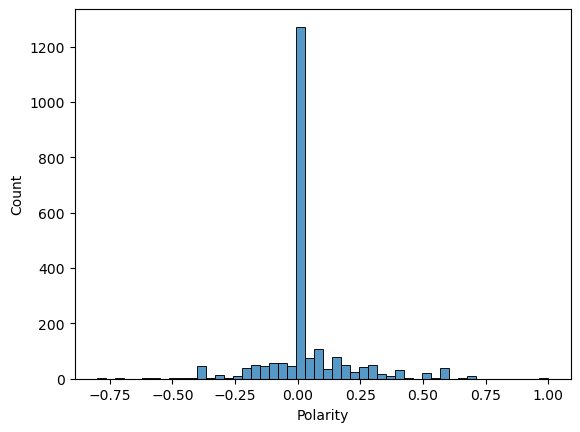

In [10]:
# Calculate sentiment polarity using textblob. The resulted values are in the range of [-1,1] 
# where 1 means positive sentiment and -1 means a negative sentiment.

df['polarity'] = df['sentence'].map(lambda text: TextBlob(text).sentiment.polarity)

# Print 5 random reviews with the sentiment polarity score over 0.4. We can check if label and polarity 
#are showing the same sentence tonality or not

cl = df.loc[df.polarity >0.4, ['sentence']].sample(5).values
for sentence in cl:
    print(sentence[0])
    index = df.index[df['sentence'] == sentence[0]][0]
    lab = df.loc[index, 'label']
    print("label=", lab, "df.polarity=", df.polarity[index])
    
sns.histplot(data=df, x='polarity', bins=50)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

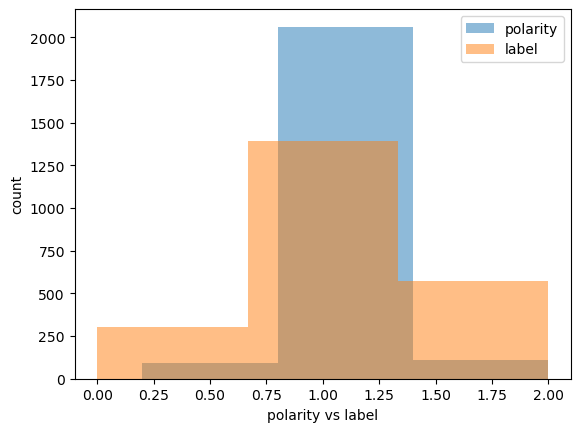

In [12]:
# Compare the label and polarity distribution when polarity is categorized in three bins 

plt2.hist(df['polarity']+1, bins=3, alpha=0.5, label='polarity')
plt2.hist(df['label'], bins=3, alpha=0.5, label='label')
plt2.xlabel('polarity vs label')
plt2.ylabel('count')
plt2.legend(loc='upper right')
plt2.show()

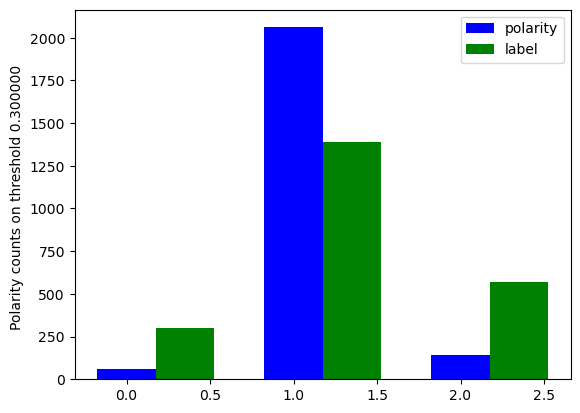

In [27]:
# Compare the effect of the threshold on polarity distribution with label. By changing the threshold we can see
# how much the distribution can be similar to the label

new_polarity_0 = 0
new_polarity_1 = 0
new_polarity_2 = 0
threshold = 0.3
for cnt in df['polarity']:
    if cnt<-threshold:
        new_polarity_0 += 1
    elif -threshold <= cnt <= threshold:
        new_polarity_1 += 1
    else:
        new_polarity_2 += 1
        
new_label_0 = 0
new_label_1 = 0
new_label_2 = 0

for cnt in df['label']:
    if cnt == 0:
        new_label_0 += 1
    elif cnt == 1:
        new_label_1 += 1
    else:
        new_label_2 += 1

new_polarity = [new_polarity_0, new_polarity_1, new_polarity_2]
new_label = [new_label_0, new_label_1, new_label_2]
X = [0, 1, 2]
p1 = plt3.bar(X, new_polarity, 0.35, color='b',label='polarity')
X_plus_float = [x + 0.35 for x in X]
p2 = plt3.bar(X_plus_float, new_label, 0.35, color='g',label='label')
plt2.ylabel('Polarity counts on threshold %f ' %threshold)
plt2.legend(loc='upper right')
plt3.show()

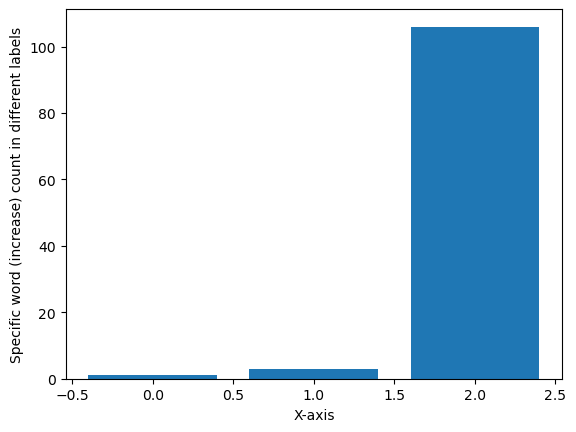

Number of sentences containing the word increase: 110
Labels of the sentences containing the word: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0]


In [32]:
# The effect of a specific word on label

word_label = []
word_count = 0
specific_word = 'increase'
for index, row in df.iterrows():
    if specific_word in row['sentence']:
        word_count += 1
        word_label.append(row['label'])

x_labels = [0, 1, 2]
counts = [word_label.count(x) for x in x_labels]
plt.bar(x_labels, counts)

plt.xlabel("X-axis")
plt.ylabel("Specific word (%s) count in different labels" %specific_word)
plt.show()        
print('Number of sentences containing the word %s:' %specific_word, word_count)
print('Labels of the sentences containing the word:', word_label)

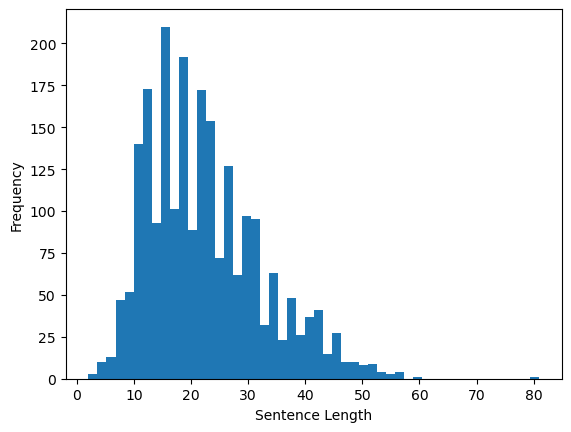

In [33]:
# Get the sentence lengths and plot the distribution of sentence lengths

sentence_lengths = [len(sentence['sentence'].split()) for sentence in dataset['train']]
plt.hist(sentence_lengths, bins=50)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Create a dataframe with the sentence lengths and labels
labels = dataset['train']['label']
df = pd.DataFrame({'sentence_length': sentence_lengths, 'label': labels})

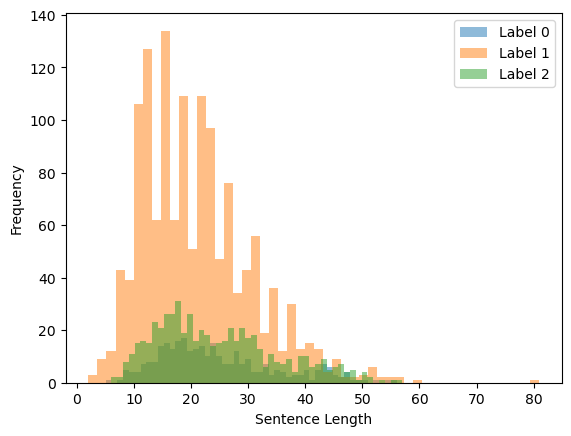

In [37]:
# Get the sentence lengths for each label

lengths_0 = [len(sentence['sentence'].split()) for sentence in dataset['train'] if sentence['label'] == 0]
lengths_1 = [len(sentence['sentence'].split()) for sentence in dataset['train'] if sentence['label'] == 1]
lengths_2 = [len(sentence['sentence'].split()) for sentence in dataset['train'] if sentence['label'] == 2]

# Plot the histograms

plt.hist(lengths_0, bins=50, alpha=0.5, label='Label 0')
plt.hist(lengths_1, bins=50, alpha=0.5, label='Label 1')
plt.hist(lengths_2, bins=50, alpha=0.5, label='Label 2')

plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

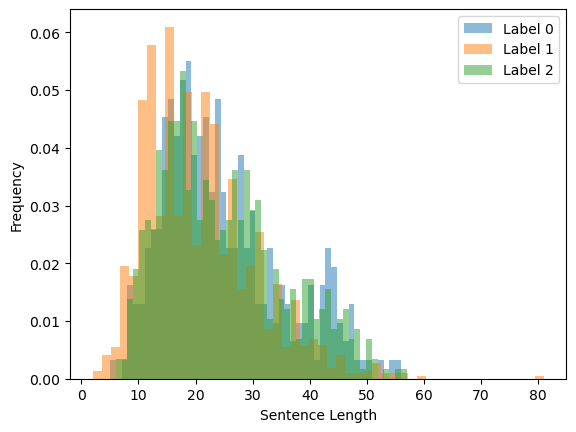

In [38]:
# Plot the normalized histograms and compare the effect of the word count on the sentence tonality (labels)
plt.hist(lengths_0, bins=50, alpha=0.5, label='Label 0', density=True)
plt.hist(lengths_1, bins=50, alpha=0.5, label='Label 1', density=True)
plt.hist(lengths_2, bins=50, alpha=0.5, label='Label 2', density=True)

plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()